### 主成分分析の実装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

pd.DataFrame(x, columns=feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)

In [3]:
pca.fit(x)

# 分散の確認
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [4]:
x_transformesd = pca.transform(x)

pd.DataFrame(x_transformesd, columns=['第一主成分', '第二主成分']).head()

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [5]:
print('第一主成分の寄与率 : {}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率 : {}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率 : 0.9246187232017271
第二主成分の寄与率 : 0.05306648311706782


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


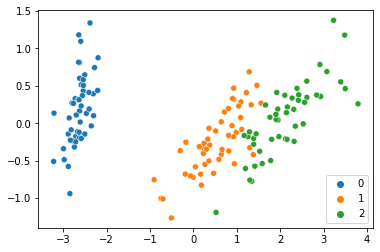

In [6]:
sns.scatterplot(x_transformesd[:, 0], x_transformesd[:, 1], hue=t, palette=sns.color_palette(n_colors=3))

### 標準化の適用

In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
pca = PCA(n_components=2, random_state=0)

x_std_transformed = pca.fit_transform(x_scaled)

In [9]:
pd.DataFrame(x_std_transformed, columns=['第一主成分', '第二主成分']).head()

,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [10]:
print('第一主成分の寄与率 : {}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率 : {}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率 : 0.7296244541329987
第二主成分の寄与率 : 0.2285076178670178


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After')

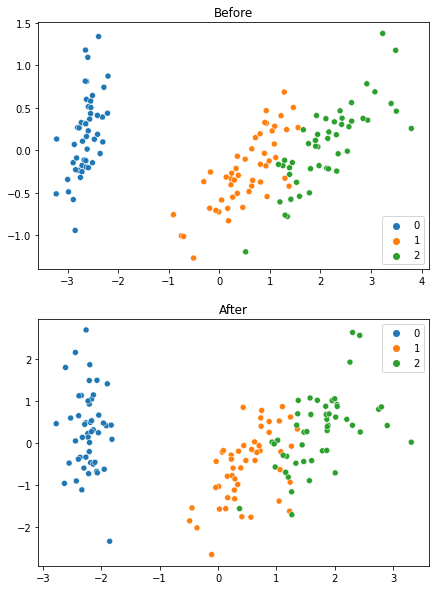

In [13]:
fig = plt.figure(figsize=(7, 10))

# 標準化適用前
ax1 = fig.add_subplot(2, 1, 1)
sns.scatterplot(x_transformesd[:, 0], x_transformesd[:, 1], hue=t, palette=sns.color_palette(n_colors=3))
ax1.set_title('Before')

# 標準化適用後
ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(x_std_transformed[:, 0], x_std_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3))
ax2.set_title('After')